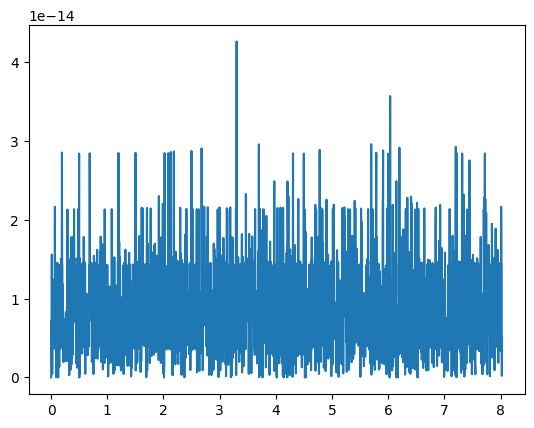

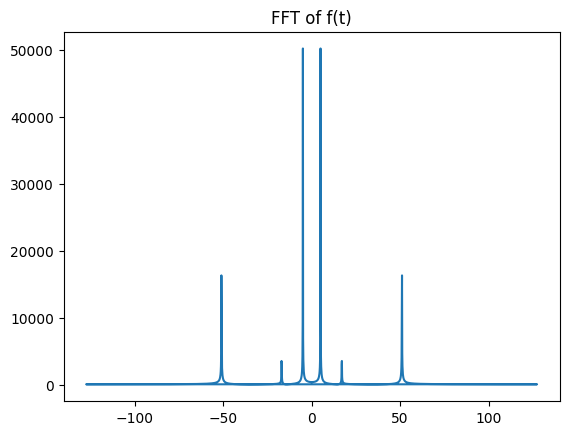

In [125]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
import sympy as sym

'''
f (t) = 51 cos(2π5t) + 5 cos(2π17t) + 21 cos(2π51t)
a) Pick the sampling frequency as 5 times the Nyquist frequency. Choose an appropriate length of the
signal and obtain the FFT of f (t).
b) Differentiate the function f (t) to obtain f′(t) and take its Fourier Transform
c) Now, obtain the derivative of this function (f (t)) by performing the appropriate operations in the
frequenct domain. Compare this with the FFT in part (b)
d) Reconstruct the f′(t) by taking the inverse fourier transform and compare with f′(t). Plot the errors
'''

f = lambda t: 51*np.cos(2*np.pi*5*t) + 5*np.cos(2*np.pi*17*t) + 21*np.cos(2*np.pi*51*t)
fs = 5*51
Np = 2048
T = Np/fs
dt = 1/fs
t = np.arange(0,T,dt)

Fs = fft(f(t),Np)
Fs_1 = ifft(Fs)

difference = np.abs(Fs_1 - f(t))
plt.plot(t,difference)
plt.show()

f = fftfreq(Np,dt)
plt.plot(f,abs(Fs))
plt.title('FFT of f(t)')
plt.savefig('HW2_3a.png')

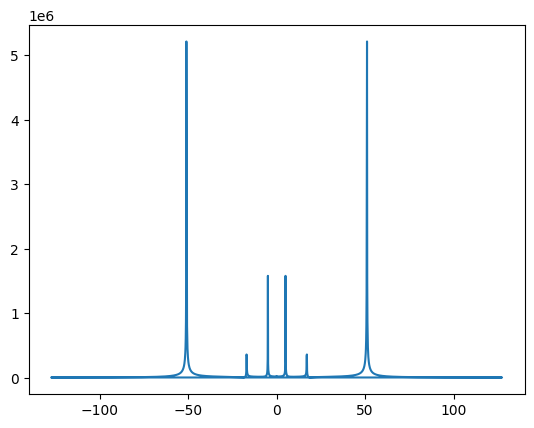

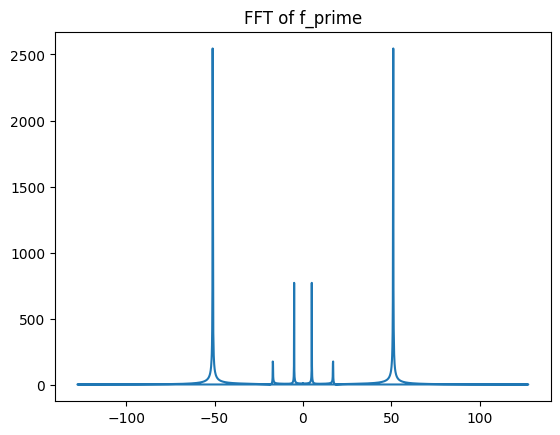

In [126]:
t = sym.symbols('t')
f = 51*sym.cos(2*sym.pi*5*t) + 5*sym.cos(2*sym.pi*17*t) + 21*sym.cos(2*sym.pi*51*t)
f_prime = sym.diff(f,t)
f_prime = sym.utilities.lambdify(t,f_prime)
t = np.arange(0,T,dt)
F_prime = fft(f_prime(t),Np)
F_prime = F_prime
f = fftfreq(Np,dt)
plt.plot(f,abs(F_prime))
plt.show()
plt.plot(f,abs(F_prime_1))
plt.title('FFT of f_prime')
plt.savefig("HW2_3_FFT_f'.png")

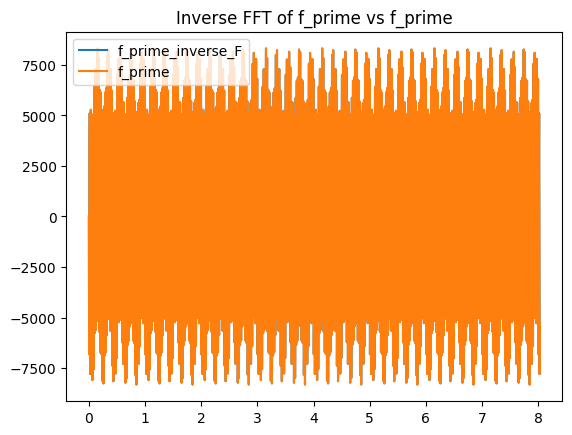

In [127]:
# do inverse transform on F_prime
f_prime_inverse_F = np.fft.ifft(F_prime)
plt.plot(t,f_prime_inverse_F, label='f_prime_inverse_F')
plt.plot(t,f_prime(t), label='f_prime')
plt.title('Inverse FFT of f_prime vs f_prime')
plt.legend()
plt.savefig('HW2_3d.png')

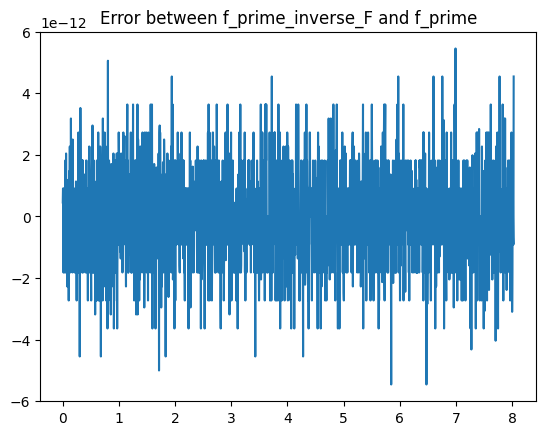

In [128]:
error = f_prime_inverse_F - f_prime(t)
plt.plot(t,error)
plt.title('Error between f_prime_inverse_F and f_prime')
plt.savefig('HW2_3d_error.png')

Python uses double precision to store values, therefore it's only accurate to only 16 order of magnitudes. Given that the difference between the values calculated with two IFFTS is 10e-16 times smaller than the actual values the rounding is probably a problem due to Python's values storage. This problem would be solved if we could plug in a function for the Fourier and Inverse Fourier transform, but we need to discretize it for the software to work with it.